<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/NN_calssify_different_clothing_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# Create the label in to small list of human readable
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
y_train[0]

np.uint8(9)

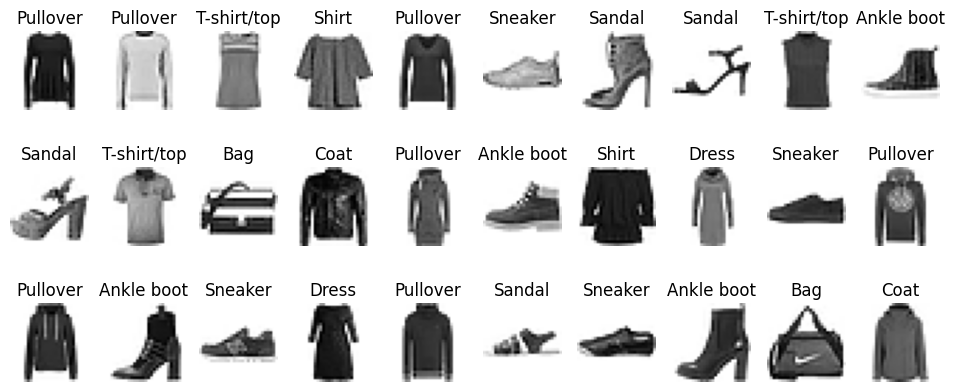

In [6]:
# Plot a random trainig dataset
import random
plt.figure(figsize=(12, 5))
for i in range(30):
  plt.subplot(3, 10, i+1)
  class_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[class_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[class_index]])
  plt.axis(False)

In [7]:
# Create a model to indentify the clothing images
# 1. create a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # this will tell the model that we are passing an image of 28x28 dimention
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Input_layer"),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Hidden_layer_1"),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Hidden_layer_2"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax, name="Output_layer"),
], name="Model_1")
# 2. Compile the model
m1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy,
           metrics=['accuracy'])
# 3. fit the model
h1 = m1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7116 - loss: 4.4116 - val_accuracy: 0.8211 - val_loss: 0.5150
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8228 - loss: 0.5083 - val_accuracy: 0.8414 - val_loss: 0.4502
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8435 - loss: 0.4343 - val_accuracy: 0.8379 - val_loss: 0.4617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8528 - loss: 0.4068 - val_accuracy: 0.8347 - val_loss: 0.4670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8575 - loss: 0.3921 - val_accuracy: 0.8516 - val_loss: 0.4337
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8635 - loss: 0.3788 - val_accuracy: 0.8542 - val_loss: 0.4160
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8703 - loss: 0.3569 - val_accuracy: 0.8546 - val_loss: 0.4211
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8747 - loss: 0

In [8]:
# 4. Evaluate the model
m1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8572 - loss: 0.4165


[0.4147426187992096, 0.8590999841690063]

<Axes: >

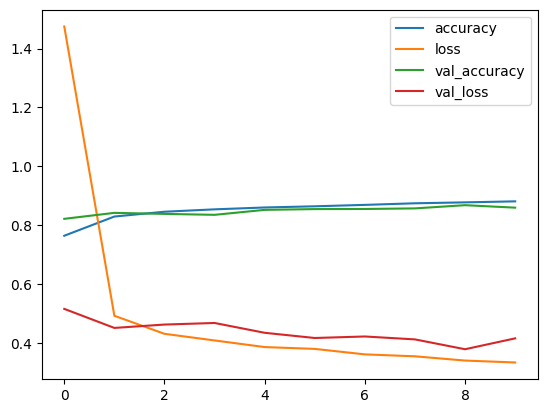

In [9]:
# 5. Check the loss curve
pd.DataFrame(h1.history).plot()

## Not really good let's try it with scaled(Normalized) data

# Neural Network prefer data to be scale(normalize), this means they like to have the numbers in tensor to find pattern between 0 & 1.

In [10]:
# Get the min and max of training dataset
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [11]:
# Let's preprocess(normalize) the x_train and x_test
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
x_train_norm.min(), x_train_norm.max()

(np.float64(0.0), np.float64(1.0))

In [12]:
m1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Input_layer (Dense)             │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,232 (2.74 MB)

 Trainable params: 239,410 (935.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 478,822 (1.83 MB)

In [13]:
m1.input_shape

(None, 28, 28)

In [102]:
# Let's create a model with scaled dataset and same as m1
# 1. create a model using sequential api
m2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax),
])
# 2. Compile the model
m2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics=['accuracy'])
# 3. Fit the model on the normalized dataset
h2 = m2.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7816 - loss: 0.6034 - val_accuracy: 0.8467 - val_loss: 0.4132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8660 - loss: 0.3634 - val_accuracy: 0.8643 - val_loss: 0.3783
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8779 - loss: 0.3275 - val_accuracy: 0.8682 - val_loss: 0.3635
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8863 - loss: 0.3050 - val_accuracy: 0.8768 - val_loss: 0.3394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8925 - loss: 0.2864 - val_accuracy: 0.8762 - val_loss: 0.3444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8964 - loss: 0.2757 - val_accuracy: 0.8783 - val_loss: 0.3445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9055 - loss: 0.2493 - val_accuracy: 0.8749 - val_loss: 0.3432
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9095 - loss: 0.2

In [103]:
# 4. Evaluate the model m2 vs m1
m2.evaluate(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3372


[0.33694177865982056, 0.8847000002861023]

In [16]:
m1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - loss: 0.4165


[0.4147426187992096, 0.8590999841690063]

<Axes: >

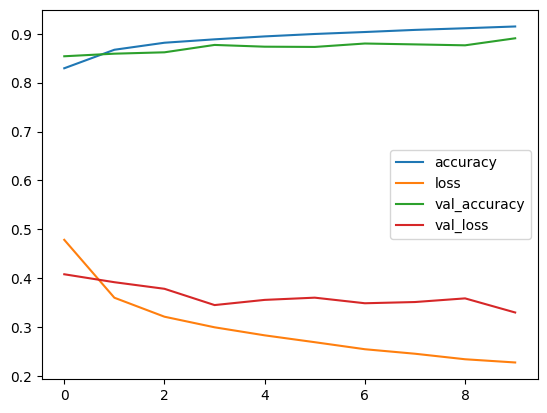

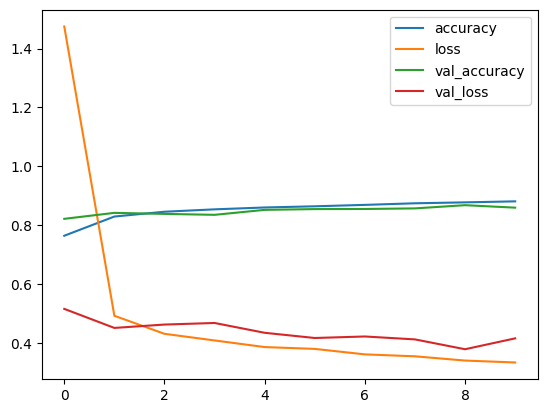

In [17]:
# 5. Plot the loss curve of m2 vs m1
pd.DataFrame(h2.history).plot()
pd.DataFrame(h1.history).plot()

In [18]:
m2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,632 (2.28 MB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 398,422 (1.52 MB)

In [51]:
# Get the ideal learning rate
# 1. create a model
m3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])
# 2. compile the model
m3.compile(optimizer=tf.keras.optimizers.Adam(),
           loss=tf.keras.losses.SparseCategoricalCrossentropy,
           metrics=['accuracy'])
# 3. define a callback to track the learning rate schecdualer
cl_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))
# 4. fit the model
h3 = m3.fit(x_train_norm, y_train, epochs=30, verbose=0, validation_data=(x_test_norm, y_test), callbacks=[cl_scheduler])


<Axes: >

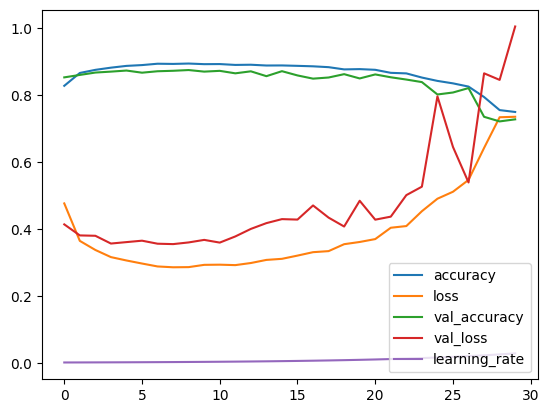

In [52]:
# Plot the loss curve
pd.DataFrame(h3.history).plot()

Text(0.5, 1.0, 'Finding the ideal Learning rate')

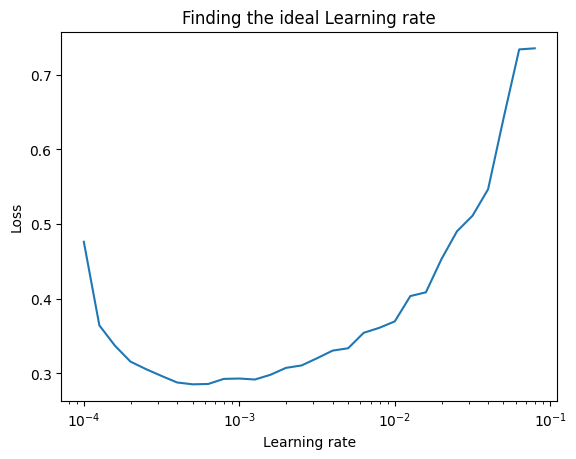

In [54]:
# Plot the learning rate decay curve
lrs = 1e-4 * 10 ** (tf.range(30)/10)
plt.semilogx(lrs, h3.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning rate")


In [55]:
m3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,632 (2.28 MB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 398,422 (1.52 MB)

In [91]:
# it seems the ideal learning rate is smaller the 0.001
# 1. crate a model
m4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])
# 2. compile the model
m4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics=['accuracy'])
# 3. fit the model
h4 = m4.fit(x_train_norm, y_train, epochs=40, validation_data=(x_test_norm, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7904 - loss: 0.5972 - val_accuracy: 0.8471 - val_loss: 0.4138
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8619 - loss: 0.3705 - val_accuracy: 0.8597 - val_loss: 0.3884
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8790 - loss: 0.3256 - val_accuracy: 0.8602 - val_loss: 0.3835
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8858 - loss: 0.3033 - val_accuracy: 0.8675 - val_loss: 0.3806
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8957 - loss: 0.2799 - val_accuracy: 0.8761 - val_loss: 0.3504
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9011 - loss: 0.2628 - val_accuracy: 0.8789 - val_loss: 0.3312
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9044 - loss: 0.2529 - val_accuracy: 0.8843 - val_loss: 0.3279
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9104 - loss: 0.2

<Axes: >

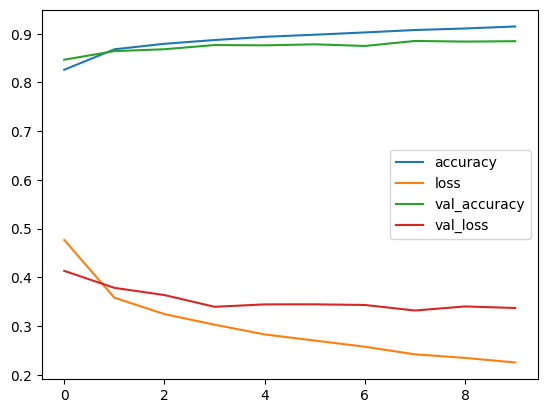

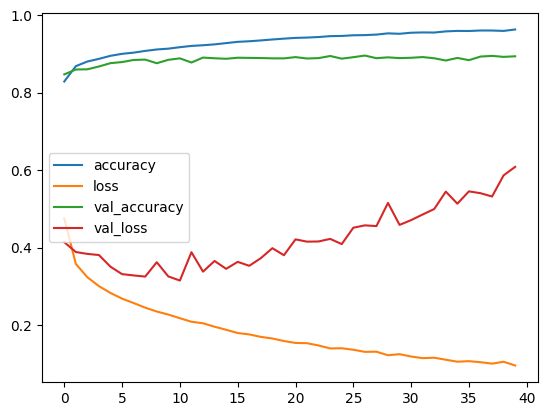

In [104]:
# compare the loss curve of m4 vs m2
pd.DataFrame(h2.history).plot()
pd.DataFrame(h4.history).plot()


> **🔑 the model m4 is overfitting**

In [93]:
# Evaluate m4 vs m2
m4.evaluate(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8948 - loss: 0.6074


[0.6082817912101746, 0.8938000202178955]

In [94]:
m2.evaluate(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8907 - loss: 0.3352


[0.3295977711677551, 0.8907999992370605]

In [105]:
# Save the model m2
m2.save("callisify_different_clothing_label.keras", overwrite=True)

In [106]:
model_m2 = tf.keras.models.load_model("callisify_different_clothing_label.keras")

In [107]:
model_m2.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,632 (2.28 MB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 398,422 (1.52 MB)

In [113]:
import numpy as np

In [188]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [266]:
x_test_norm.shape

(10000, 28, 28)

In [190]:
y_prod = m2.predict(x_test_norm)
# conver the prediction probabilities to integer
y_pred_2_mulit_class = y_prod.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [194]:
y_prod[0], y_pred_2_mulit_class[0], class_names[y_pred_2_mulit_class[0]], y_pred_2_mulit_class[:10], y_test[:10]

(array([5.1144009e-09, 8.7923894e-07, 1.5554555e-08, 4.7590733e-11,
        6.3028909e-07, 1.1605817e-05, 1.0378973e-08, 9.3195224e-03,
        6.8439515e-10, 9.9066728e-01], dtype=float32),
 np.int64(9),
 'Ankle boot',
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [192]:
# Check the confusion matrix of model 2
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred_2_mulit_class)

array([[907,   0,  17,  25,   2,   0,  44,   0,   5,   0],
       [  3, 973,   0,  18,   1,   0,   5,   0,   0,   0],
       [ 23,   2, 791,  13,  98,   0,  73,   0,   0,   0],
       [ 26,   9,   8, 932,   8,   0,  13,   0,   4,   0],
       [  0,   0,  95,  61, 789,   0,  53,   0,   2,   0],
       [  0,   0,   0,   0,   0, 947,   0,  31,   4,  18],
       [207,   0,  74,  40,  66,   0, 608,   0,   5,   0],
       [  0,   0,   0,   0,   0,   8,   0, 977,   0,  15],
       [  4,   0,   4,   6,   1,   2,   3,   3, 977,   0],
       [  0,   0,   0,   0,   0,   3,   1,  50,   0, 946]])

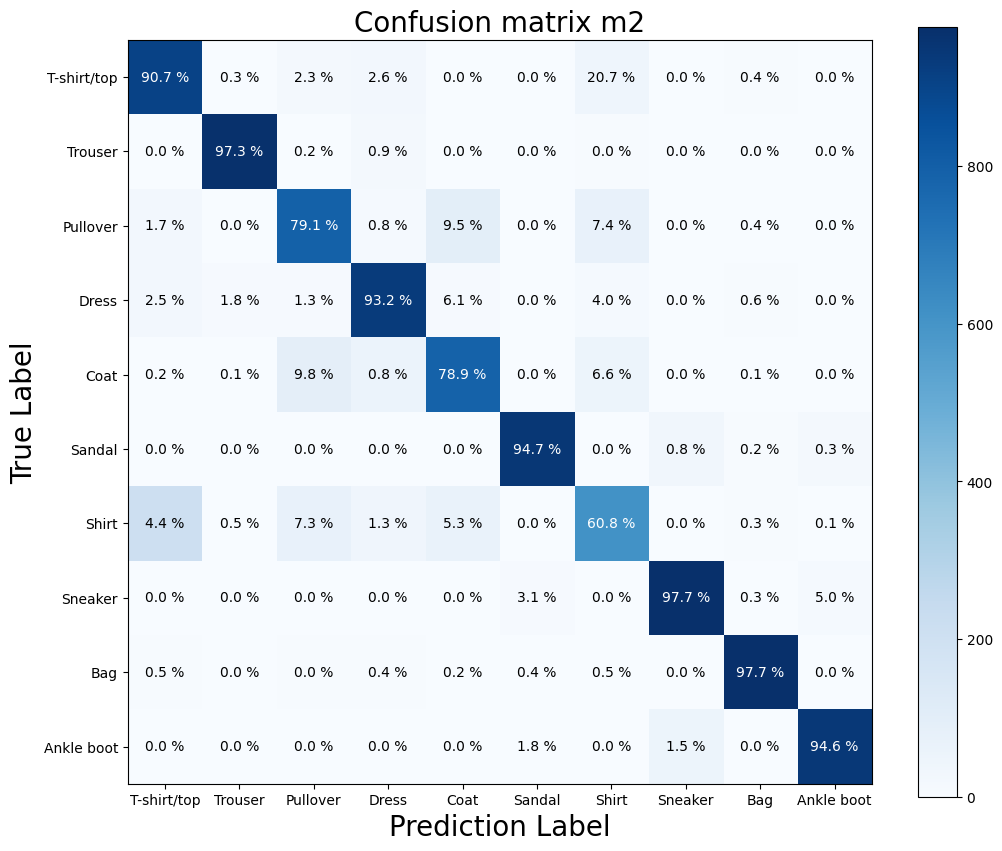

In [212]:
# Pretify the confusion matrix
import itertools
# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_2_mulit_class)
# create normalized matrix
cm_norm = cm.astype('float')/(cm.sum(axis=1)[:, np.newaxis])
# Setup number of classes
no_classes = cm.shape[0]

# Prefify confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
# create the matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = class_names
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# set thresholder
thresholder = (cm.max() + cm.min())/2
# Plot some text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(i, j,
            f"{cm_norm[i, j]*100:.1f} %",
            horizontalalignment='center',
            verticalalignment='center',
            color= "white" if cm[i, j]>thresholder else 'black',
            size=10)

# Label the axis
ax.set(title="Confusion matrix m2",
       xlabel="Prediction Label",
       ylabel="True Label",
       xticks=np.arange(no_classes),
       yticks=np.arange(no_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the axis label to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
# Adjust the label font size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## Visualizing random model prediction

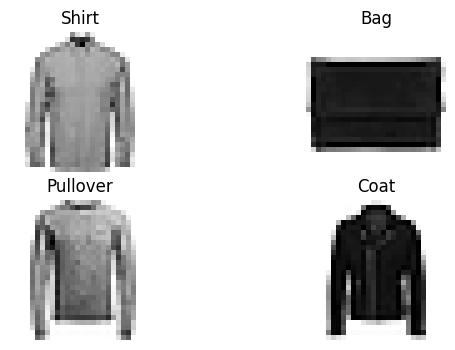

In [249]:
# plot random images on training dataset
import random
plt.figure(figsize=(7, 4))
for i in range(4):
  random_index = random.choice(range(len(x_train)))
  plt.subplot(2, 2, i+1)
  plt.imshow(x_train[random_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[random_index]])
  plt.axis(False)

In [273]:
x_test_norm[0].shape

(28, 28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


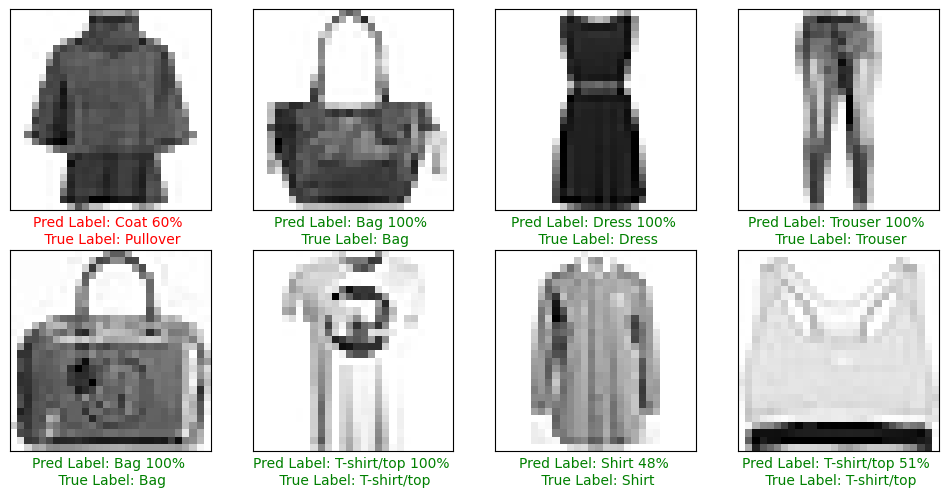

In [331]:
# Plot the predicted image
plt.figure(figsize=(12, 12))
for i in range(8):

  random_index = random.choice(range(len(x_test_norm)))
  target_img = x_test_norm[random_index]
  plt.subplot(4, 4, i+1)
  plt.imshow(target_img, cmap=plt.cm.binary)
  y_prob_target_img = m2.predict(target_img.reshape(1, 28, 28))
  y_pred_target_img = y_prob_target_img.argmax(axis=1)
  pred_label = class_names[y_pred_target_img[0]]
  true_label = class_names[y_test[random_index]]
  if pred_label == true_label:
    color='green'
  else:
    color='red'
  # plt.axis(False)
  plt.xlabel("Pred Label: {} {:2.0f}% \n True Label: {}".format(
      pred_label,
      100*tf.reduce_max(y_prob_target_img),
      true_label), color=color, size=10)
  plt.xticks([])
  plt.yticks([])

